In [8]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
%pip install --upgrade pip
%pip uninstall -y tensorflow
%pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-2.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
Using cached tensorflow-2.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorf

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 64
CHANNELS = 3
EPOCHS = 50

In [11]:
KAGGLE_DATASET_PATH = r"/kaggle/input/skin-diseases-detection-using-deep-learning-small/IMG_CLASSES_DATASET"

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    KAGGLE_DATASET_PATH,  #Directory containing the dataset For colab (r"/content/IMG_CLASSES_DATASET",)
    shuffle=True,  #Shuffle the dataset
    image_size=(IMAGE_SIZE,IMAGE_SIZE),  #Resize images to 256x256 pixels
    batch_size=BATCH_SIZE  #Batch size for training
    )

# For Kaggle KAGGLE_DATASET_PATH = r"../input/your-private-dataset-slug/IMG_CLASSES_DATASET"

Found 6900 files belonging to 34 classes.


In [12]:
class_names = [name.split('(')[0].strip() for name in dataset.class_names]
class_names

['1. Eczema',
 '10. Warts Molluscum and other Viral Infections',
 '11. Pigment',
 '12. Enfeksiyonel',
 '13. Akne',
 '14. Enfeksiyonel',
 '15. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 '16. Bullous Disease Photos',
 '17. Cellulitis Impetigo and other Bacterial Infections',
 '18. Exanthems and Drug Eruptions',
 '19. Hair Loss Photos Alopecia and other Hair Diseases',
 '2. Melanoma',
 '20. Herpes HPV and other STDs Photos',
 '21. Light Diseases and Disorders of Pigmentation',
 '22. Lupus and other Connective Tissue diseases',
 '23. Nail Fungus and other Nail Disease',
 '24. Poison Ivy Photos and other Contact Dermatitis',
 '25. Rosacea Photos',
 '26. Scabies Lyme Disease and other Infestations and Bites',
 '27. Seborrheic Keratoses and other Benign Tumors',
 '28. Systemic Disease',
 '29. Tinea Ringworm Candidiasis and other Fungal Infections',
 '3. Atopic Dermatitis',
 '30. Urticaria Hives',
 '31. Vascular Tumors',
 '32. Vasculitis Photos',
 '33. Warts Molluscu

In [13]:
len(dataset)

108

In [14]:
108*64

6912

# 6912 images in total last batch was not proper
# 64 was Batch size

# EXPLORE DATA

In [15]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(64, 256, 256, 3)
[ 7 18 32 26 10  3 28 17 31  1 21 26 28 25 18 26  0  4 30 28  9 15  2 17
 17 12 31 16 20 33  9  9 16  6  1 19 25  0 11 33 25  4 17  0  7 31  8  2
 27  6  2  8 19 11  6 25 24  9  4 19 30  5 20 13]


(64, 256, 256, 3)


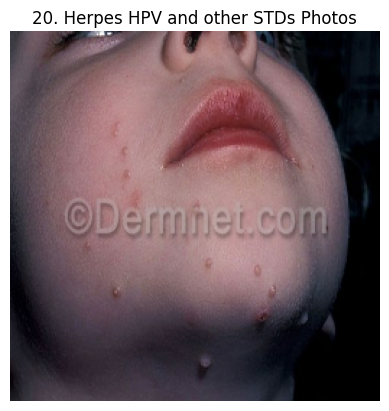

In [16]:
for image_batch, labels_batch in dataset.take(1):
    # print(image_batch[0]) # it will give image as a tensor
    # print(image_batch[0].numpy()) # it will give label as a numpy array
    print(image_batch.shape)  # (32, 256, 256, 3) 32 images of size 256x256 with 3 channels
    plt.imshow(image_batch[0].numpy().astype("uint8"))  # Display the first image
    plt.axis("off")  # Hide the axis
    plt.title(class_names[labels_batch[0]])  # Display the label of the first

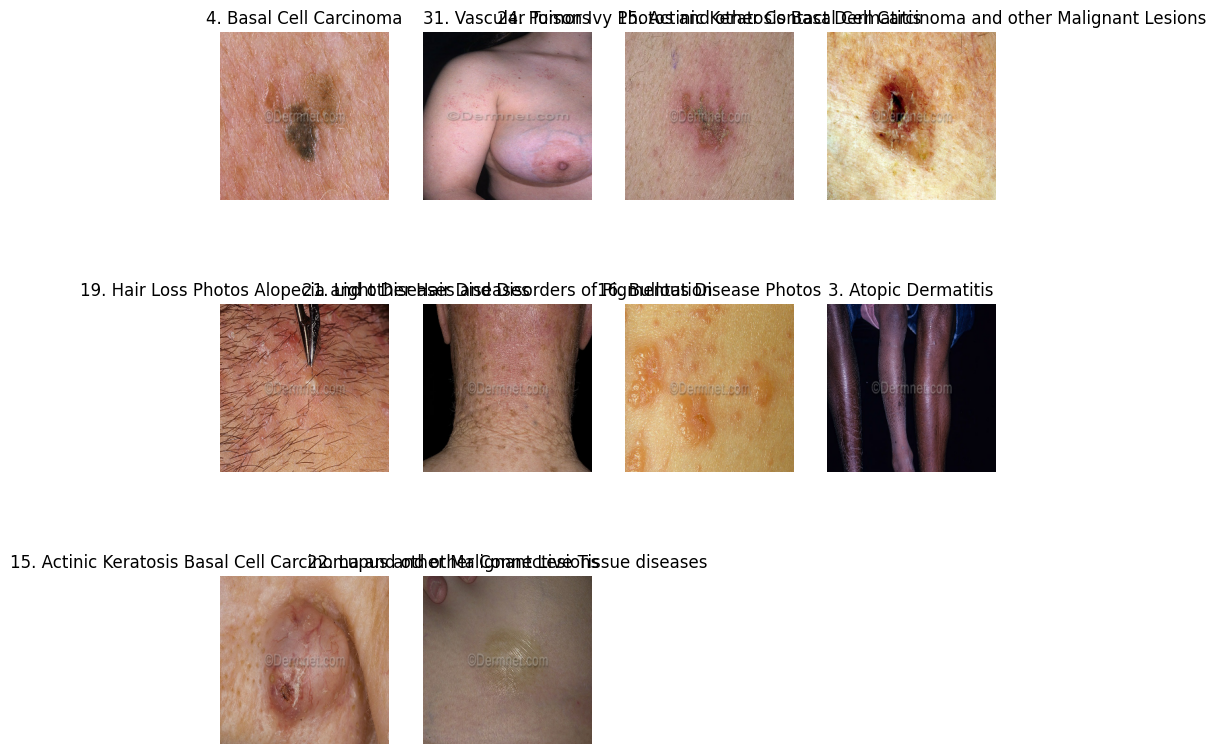

In [17]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


# **Reasoning**:
Iterate through the dataset to count the number of images in each class and store the counts in a dictionary.


In [18]:
from collections import Counter

class_counts = Counter()
for _, labels_batch in dataset:
    class_counts.update(labels_batch.numpy())

sorted_class_counts = sorted(class_counts.items(), key=lambda item: item[0])

for class_index, count in sorted_class_counts:
    print(f"Class {class_names[class_index]}: {count} images")

Class 1. Eczema: 200 images
Class 10. Warts Molluscum and other Viral Infections: 200 images
Class 11. Pigment: 200 images
Class 12. Enfeksiyonel: 300 images
Class 13. Akne: 200 images
Class 14. Enfeksiyonel: 200 images
Class 15. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 200 images
Class 16. Bullous Disease Photos: 200 images
Class 17. Cellulitis Impetigo and other Bacterial Infections: 200 images
Class 18. Exanthems and Drug Eruptions: 200 images
Class 19. Hair Loss Photos Alopecia and other Hair Diseases: 200 images
Class 2. Melanoma: 200 images
Class 20. Herpes HPV and other STDs Photos: 200 images
Class 21. Light Diseases and Disorders of Pigmentation: 200 images
Class 22. Lupus and other Connective Tissue diseases: 200 images
Class 23. Nail Fungus and other Nail Disease: 200 images
Class 24. Poison Ivy Photos and other Contact Dermatitis: 200 images
Class 25. Rosacea Photos: 200 images
Class 26. Scabies Lyme Disease and other Infestations and Bites: 200 i

In [19]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Get the true labels from the dataset
all_labels = []
for _, labels_batch in dataset:
    all_labels.extend(labels_batch.numpy())

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)

class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

Class weights: {0: 1.0147058823529411, 1: 1.0147058823529411, 2: 1.0147058823529411, 3: 0.6764705882352942, 4: 1.0147058823529411, 5: 1.0147058823529411, 6: 1.0147058823529411, 7: 1.0147058823529411, 8: 1.0147058823529411, 9: 1.0147058823529411, 10: 1.0147058823529411, 11: 1.0147058823529411, 12: 1.0147058823529411, 13: 1.0147058823529411, 14: 1.0147058823529411, 15: 1.0147058823529411, 16: 1.0147058823529411, 17: 1.0147058823529411, 18: 1.0147058823529411, 19: 1.0147058823529411, 20: 1.0147058823529411, 21: 1.0147058823529411, 22: 1.0147058823529411, 23: 1.0147058823529411, 24: 1.0147058823529411, 25: 1.0147058823529411, 26: 1.0147058823529411, 27: 1.0147058823529411, 28: 1.0147058823529411, 29: 1.0147058823529411, 30: 1.0147058823529411, 31: 1.0147058823529411, 32: 1.0147058823529411, 33: 1.0147058823529411}


# Split the DATASET

In [20]:
train_size = 0.8
len(dataset)*train_size

86.4

In [21]:
train_ds=dataset.take(86)  # 86 batches for training
len(train_ds)

86

In [22]:
test_ds=dataset.skip(86)  # Skip the first 86 batches for validtion and test
len(test_ds)  # 22 batches for validation and test

22

In [23]:
val_size = 0.1
len(dataset)*val_size

10.8

In [24]:
val_ds=test_ds.take(11)  # 11 batches for validation
len(val_ds)

11

In [25]:
test_ds=test_ds.skip(6)  # 11 batches for validation
len(test_ds)

16

# Function to Split Dataset into Train, Test and Validation

In [26]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=1000):

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds

In [27]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [28]:
len(train_ds), len(val_ds), len(test_ds)

(86, 10, 12)

# Caching

for second iteration we will use the same dataset, so we will cache it to speed up the process. Data is in main memory.

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Pre-Processing

# Scaling

In [30]:
# resize_and_rescale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     layers.experimental.preprocessing.Rescaling(1.0/255)

# ])

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

# DataAugmention
for making model Robust

with diffferent angles, brightness, contrast, etc.

In [31]:

# data_augmentation = tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     layers.experimental.preprocessing.RandomRotation(0.2)
# ])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

# Build the model
We are using CNN for train the data

In [32]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    tf.keras.layers.Rescaling(1.0/255),
    # data_augmentation,   # Data augmentation

    # Apply 2D convolution (layers, kernel size, activation)
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2), # after CNN layer there is pooling layer max pooling or min #reduce size and preserve feature


    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes , activation='softmax')  # Output layer with softmax

])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,762 (725.63 KB)

 Trainable params: 185,762 (725.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))



In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



In [36]:
history = model.fit(
    train_ds,
    epochs=EPOCHS ,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    class_weight=class_weights_dict # Use the calculated class weights
)

Epoch 1/50
 1/86 ━━━━━━━━━━━━━━━━━━━━ 44:42 32s/step - accuracy: 0.0625 - loss: 3.5174

I0000 00:00:1759376050.865426     121 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 ━━━━━━━━━━━━━━━━━━━━ 72s 471ms/step - accuracy: 0.0266 - loss: 3.5292 - val_accuracy: 0.0281 - val_loss: 3.5263
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.0288 - loss: 3.5265 - val_accuracy: 0.0156 - val_loss: 3.5267
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.0315 - loss: 3.5265 - val_accuracy: 0.0281 - val_loss: 3.5256
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.0337 - loss: 3.5264 - val_accuracy: 0.0375 - val_loss: 3.5249
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.0319 - loss: 3.5249 - val_accuracy: 0.0531 - val_loss: 3.5078
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.0535 - loss: 3.4634 - val_accuracy: 0.0500 - val_loss: 3.4720
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.0574 - loss: 3.4539 - val_accuracy: 0.0516 - val_loss: 3.4664
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.0579 - loss: 3.4310 - val_accuracy: 0.054

In [37]:
scores = model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.3281 - loss: 2.3802


In [38]:
scores

[2.380249261856079, 0.328125]

In [39]:
history

In [40]:

history.params

{'verbose': 1, 'epochs': 50, 'steps': 86}

In [41]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [42]:
len(history.history['accuracy'])  # we can plot these history values in chart

50

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

we can plot these history values in chart

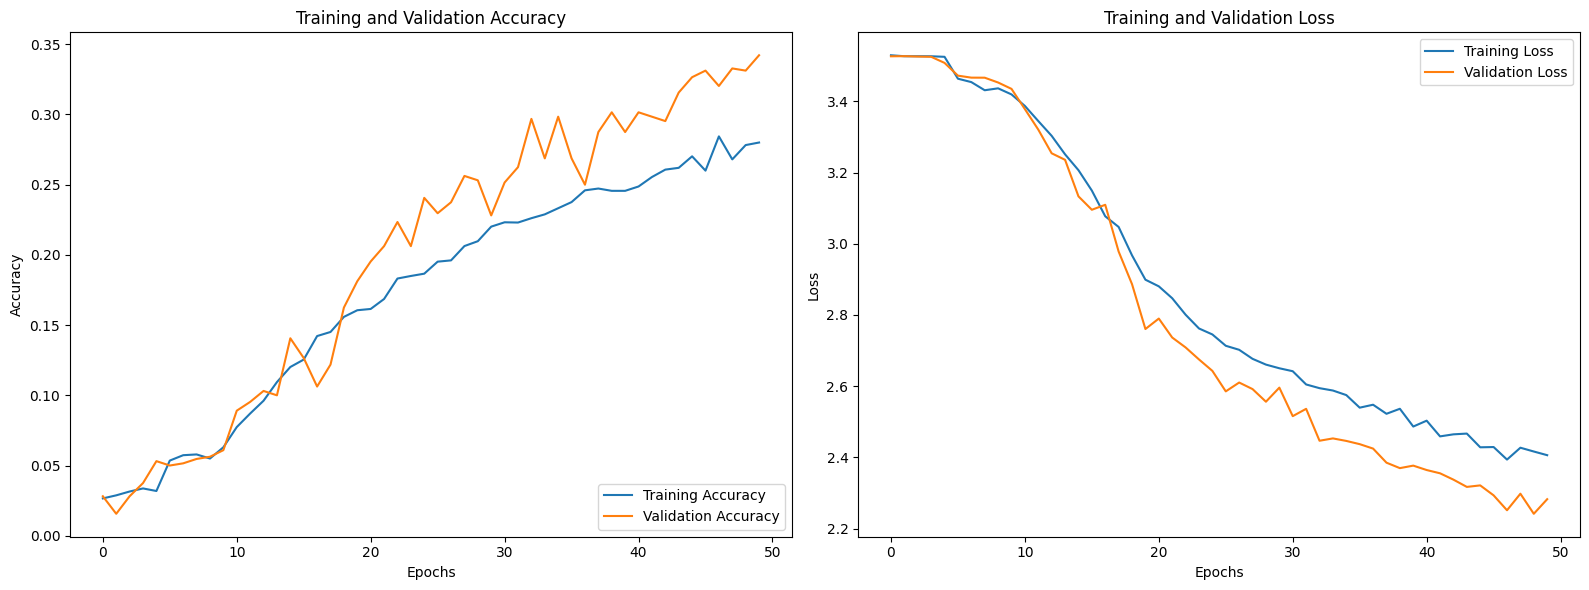

In [44]:
plt.figure(figsize=(16, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Make a Prediction

In [45]:

import numpy as np

In [46]:
np.argmax([2.189804e-04, 9.080725e-01, 9.170856e-02])  # output of the below prediction

1

First image to predict: 
First image's actual label:  1. Eczema
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
Batch prediction:  [1.0181614e-01 1.6292095e-01 7.8752480e-02 2.2255789e-04 1.1766776e-01
 1.9520235e-01 2.3940959e-04 1.2303955e-03 7.8580910e-05 5.6334952e-04
 9.8765122e-07 1.4873846e-01 6.3469325e-04 2.2179607e-05 5.3195250e-05
 4.2574917e-05 5.4405151e-05 2.3175756e-04 1.9976693e-04 6.2667619e-04
 3.5242938e-05 2.1973072e-05 2.2583427e-04 1.2978655e-04 3.3368316e-04
 9.8979159e-05 1.5800114e-04 1.7860020e-06 2.2507487e-04 8.3920389e-02
 1.0472950e-01 4.4556495e-04 3.2877392e-04 4.6745397e-05]
Predicted label:  14. Enfeksiyonel


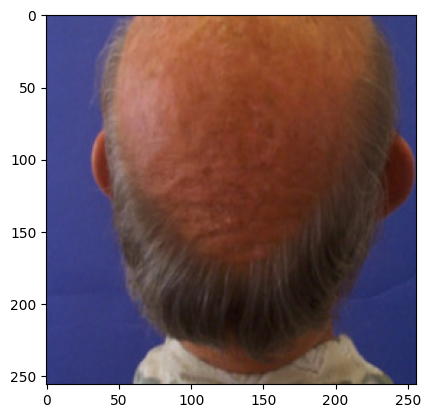

In [47]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')  # Display the first image in the batch
    first_label = labels_batch[0]  # Get the label of the first image

    print("First image to predict: ")
    plt.imshow(first_image)
    print("First image's actual label: ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Batch prediction: ", batch_prediction[0])
    # print(class_names[np.argmax(batch_prediction[0])])  # Display the predicted label for the first image
    print("Predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [48]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


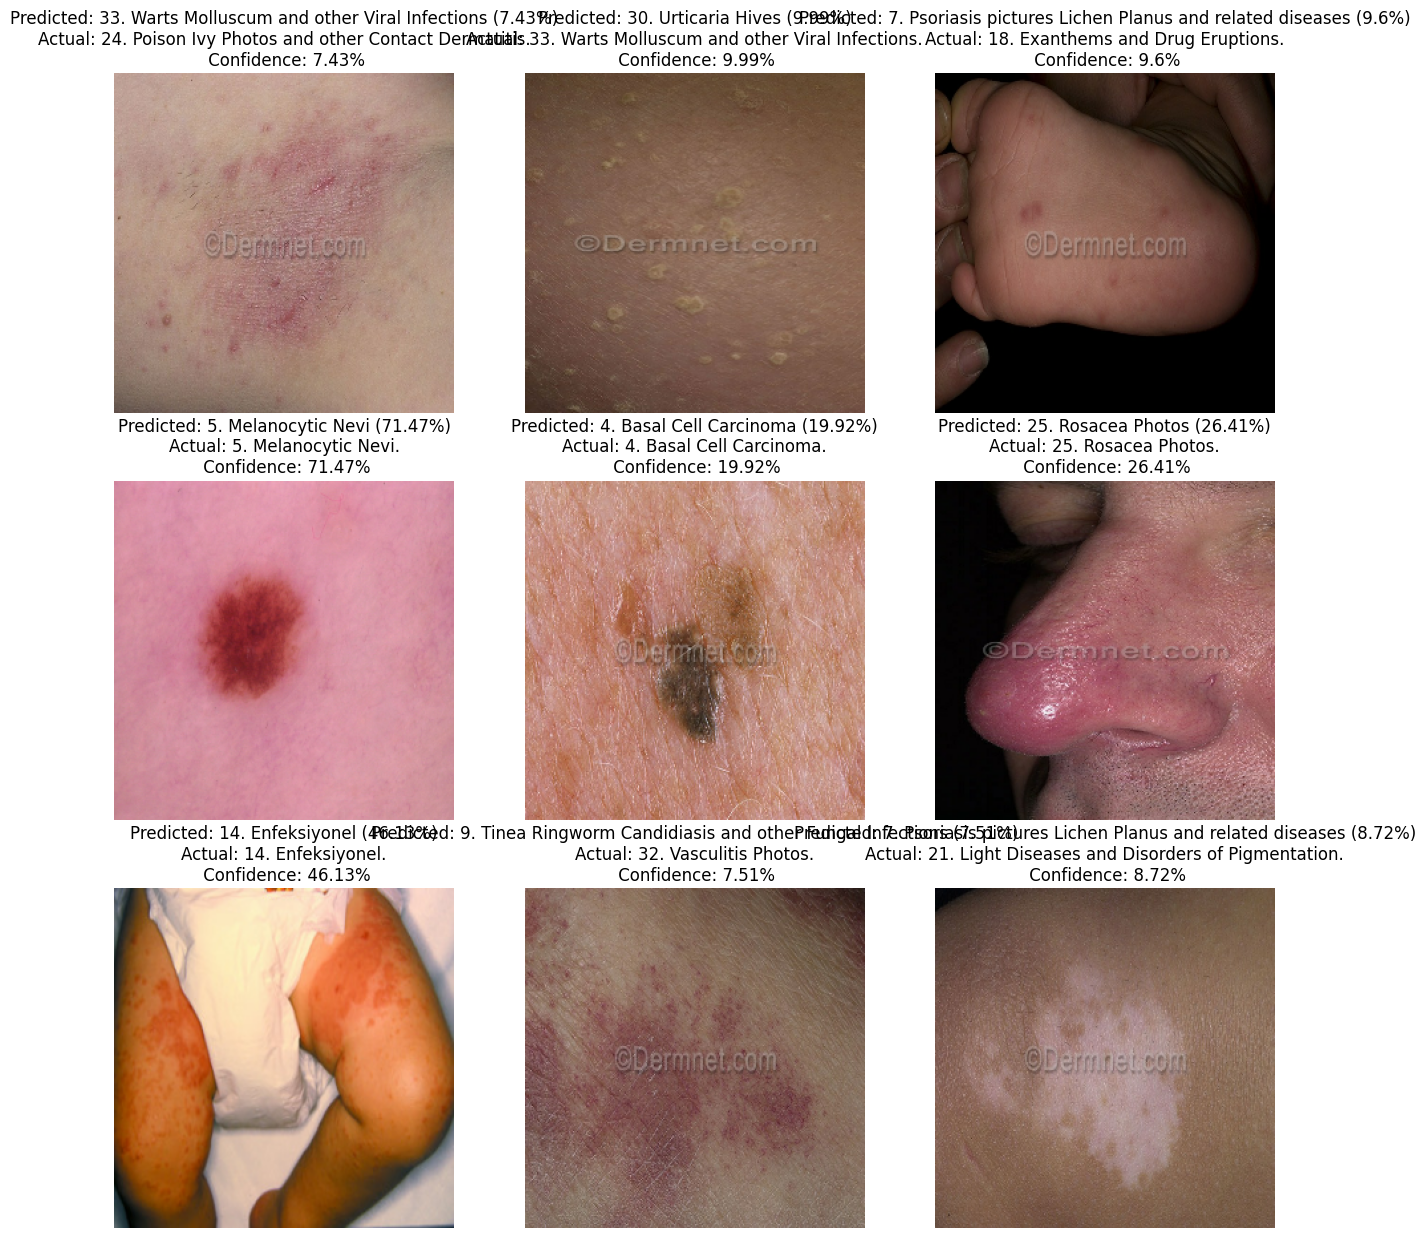

In [49]:
plt.figure (figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        # ax = plt.subplot(3, 4, i + 1)
        # plt.imshow(image_batch[i].numpy().astype("uint8"))
        # predicted_class, confidence = predict(model, image_batch)
        # plt.title(f"Predicted: {predicted_class} ({confidence}%)")
        # plt.axis("off")
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]

        plt.title(f"Predicted: {predicted_class} ({confidence}%)\nActual: {actual_class}.\n Confidence: {confidence}%")

        plt.axis("off")

# Save The Models


In [50]:

import os

In [51]:
model_version=1
model.save(f"/kaggle/working/{model_version}.keras")

In [52]:
model_version=2
model.save(f"/kaggle/working/{model_version}.h5")

# Auto increment version number and models saved

In [53]:
import os
# Get all folder/file names that are digits, convert to int, or use 0 if none
existing_versions = [int(i) for i in os.listdir("/kaggle/working/") if i.isdigit()]
model_version = max(existing_versions, default=0) + 1
model.save(f"/kaggle/working/{model_version}.keras")

In [54]:
import os
# Get all folder/file names that are digits, convert to int, or use 0 if none
existing_versions = [int(i) for i in os.listdir("/kaggle/working/") if i.isdigit()]
model_version = max(existing_versions, default=0) + 1
model.save(f"/kaggle/working/{model_version}.keras")  # Add .keras extension for Keras format

In [55]:
model_version = 2
model.export(f"/kaggle/working/{model_version}")

Saved artifact at '/kaggle/working/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 34), dtype=tf.float32, name=None)
Captures:
  138742009073872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138742009070032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138744223317648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138744223317840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138742009075600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138742009073488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138742009069648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138744225792848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138742009075984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138744225792080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138744225793